Import library 

In [5]:
import pandas as pd
import os

Dataset path

In [6]:
folder="D:\\ALL\\Datasets"
file="Global_AI_Content_Impact_Dataset.csv"
csv_file=os.path.join(folder,file)

Datatypes 

In [7]:
dataset=pd.read_csv(csv_file)
print(dataset.dtypes)

Country                                        object
Year                                            int64
Industry                                       object
AI Adoption Rate (%)                          float64
AI-Generated Content Volume (TBs per year)    float64
Job Loss Due to AI (%)                        float64
Revenue Increase Due to AI (%)                float64
Human-AI Collaboration Rate (%)               float64
Top AI Tools Used                              object
Regulation Status                              object
Consumer Trust in AI (%)                      float64
Market Share of AI Companies (%)              float64
dtype: object


Null values checking

In [9]:
print(dataset.isnull().sum())

Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64


Statistical report

In [10]:
print(dataset.describe())

              Year  AI Adoption Rate (%)  \
count   200.000000            200.000000   
mean   2022.315000             54.265850   
std       1.825496             24.218067   
min    2020.000000             10.530000   
25%    2021.000000             33.222500   
50%    2022.000000             53.310000   
75%    2024.000000             76.220000   
max    2025.000000             94.760000   

       AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
count                                   200.00000              200.000000   
mean                                     46.07260               25.788250   
std                                      29.16122               13.901105   
min                                       1.04000                0.090000   
25%                                      20.32250               14.995000   
50%                                      44.32000               25.735000   
75%                                      71.62000               

Input -- Features

In [44]:
x=dataset.drop(["Job Loss Due to AI (%)"],axis=1)
print(x)

         Country  Year    Industry  AI Adoption Rate (%)  \
0    South Korea  2022       Media                 44.29   
1          China  2025       Legal                 34.75   
2            USA  2022  Automotive                 81.06   
3         France  2021       Legal                 85.24   
4         France  2021      Gaming                 78.95   
..           ...   ...         ...                   ...   
195      Germany  2021  Automotive                 89.44   
196      Germany  2020       Media                 70.11   
197       France  2023   Marketing                 65.77   
198    Australia  2023  Automotive                 45.35   
199  South Korea  2020  Healthcare                 10.53   

     AI-Generated Content Volume (TBs per year)  \
0                                         33.09   
1                                         66.74   
2                                         96.13   
3                                         93.76   
4                       

Output -- Target

In [45]:
y=dataset["Job Loss Due to AI (%)"]
print(y)

0      16.77
1      46.89
2      10.66
3      27.70
4      17.45
       ...  
195    48.47
196    27.62
197    39.94
198    33.21
199    23.64
Name: Job Loss Due to AI (%), Length: 200, dtype: float64


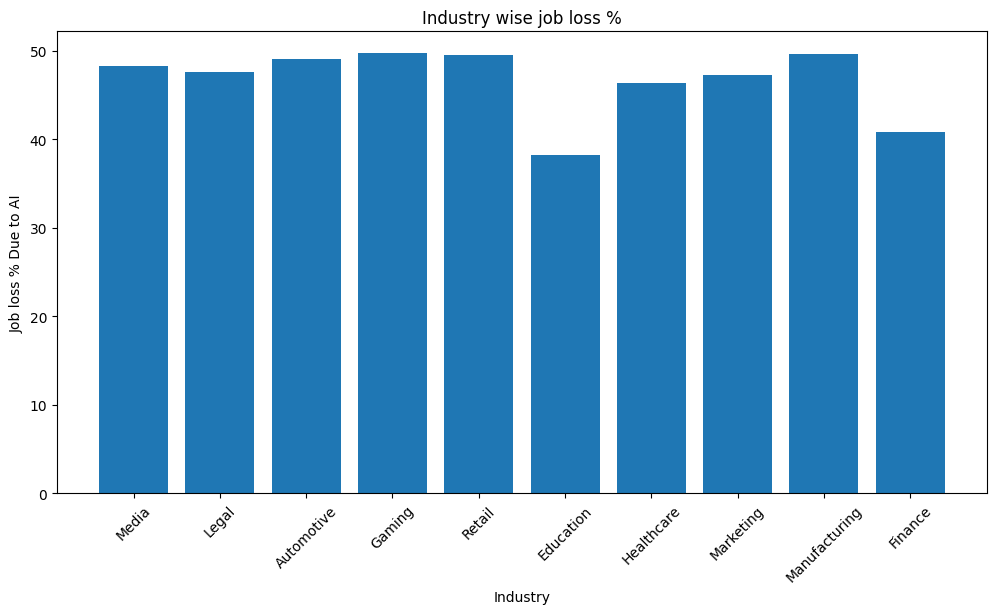

In [204]:
import matplotlib.pyplot as plt
industry=x["Industry"]
plt.figure(figsize=(12,6))
plt.bar(industry,y)
plt.title("Industry wise job loss %")
plt.xlabel("Industry")
plt.ylabel("Job loss % Due to AI")
plt.xticks(rotation=45)
plt.show()

Encoding for categorical values

In [46]:
category=["Country","Industry","Top AI Tools Used","Regulation Status"]
X=pd.get_dummies(x,columns=category,drop_first=False)
print(X)

     Year  AI Adoption Rate (%)  AI-Generated Content Volume (TBs per year)  \
0    2022                 44.29                                       33.09   
1    2025                 34.75                                       66.74   
2    2022                 81.06                                       96.13   
3    2021                 85.24                                       93.76   
4    2021                 78.95                                       45.62   
..    ...                   ...                                         ...   
195  2021                 89.44                                       52.98   
196  2020                 70.11                                       28.26   
197  2023                 65.77                                       49.83   
198  2023                 45.35                                       20.49   
199  2020                 10.53                                       20.97   

     Revenue Increase Due to AI (%)  Human-AI Colla

In [47]:
print(len(X.columns))

37


Spliting Train and Test data

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 37)
(50, 37)
(150,)
(50,)


Alogrithms

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear=LinearRegression()
random=RandomForestRegressor()

In [50]:
linear.fit(x_train,y_train)
random.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
Models={"LinearRegression":linear,
        "RandomForest":random}
import pickle
with open("ai_impact.pkl","wb") as f:
    pickle.dump(Models,f)

In [52]:
y_pred1=linear.predict(x_test)
y_pred2=random.predict(x_test)

Mean_squared_error outliers and R2 score variance

In [53]:
from sklearn.metrics import mean_squared_error,r2_score

error1=mean_squared_error(y_test,y_pred1)
error2=mean_squared_error(y_test,y_pred2)

score1=r2_score(y_test,y_pred1)
score2=r2_score(y_test,y_pred2)

print(f"Linear_Regression MSE:{error1}")
print(f"Random forest     MSE:{error2}")
print(f"Linear_Regression R2 score:{score1}")
print(f"RandomForest      R2 score:{score2}")


Linear_Regression MSE:268.69321803681504
Random forest     MSE:248.8510790932
Linear_Regression R2 score:-0.21933445288657594
RandomForest      R2 score:-0.12929048449137337


User input

In [62]:
import numpy as np
new=["india",2025,"Gaming",20,20,20,30,30,"chatgpt","Moderate",30,20]

new_df=pd.DataFrame([new],columns=X.columns[:len(new)])
dum=pd.get_dummies(new_df)
new_data=dum.reindex(columns=X.columns,fill_value=0)


result=linear.predict(new_data)/100
if result>30:
    print("High")
elif result>15:
    print("Moderate")
else:
    print("Low")

Moderate


Arima for Time series prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Load Year_data

In [ ]:
year=dataset["Year"]
year=pd.to_datetime(year,format="%Y")
print(year)

0     2022-01-01
1     2025-01-01
2     2022-01-01
3     2021-01-01
4     2021-01-01
         ...    
195   2021-01-01
196   2020-01-01
197   2023-01-01
198   2023-01-01
199   2020-01-01
Name: Year, Length: 200, dtype: datetime64[ns]


Revenue increase %

In [136]:
revenue=dataset["Revenue Increase Due to AI (%)"]
print(revenue[:5])

0    46.12
1    52.46
2    45.60
3    78.24
4     1.05
Name: Revenue Increase Due to AI (%), dtype: float64


Compine Year and Revenue data

In [153]:
new_data=pd.DataFrame({"Year":year,
                     "Revenue increase%":revenue})
print(new_data)

          Year  Revenue increase%
0   2022-01-01              46.12
1   2025-01-01              52.46
2   2022-01-01              45.60
3   2021-01-01              78.24
4   2021-01-01               1.05
..         ...                ...
195 2021-01-01              12.14
196 2020-01-01              57.86
197 2023-01-01              79.44
198 2023-01-01              50.50
199 2020-01-01              34.27

[200 rows x 2 columns]


Move year in index

In [170]:
index_years=new_data.set_index("Year")
print(index_years)

            Revenue increase%
Year                         
2022-01-01              46.12
2025-01-01              52.46
2022-01-01              45.60
2021-01-01              78.24
2021-01-01               1.05
...                       ...
2021-01-01              12.14
2020-01-01              57.86
2023-01-01              79.44
2023-01-01              50.50
2020-01-01              34.27

[200 rows x 1 columns]


Arima Model

In [171]:
arima_model=ARIMA(new_data["Revenue increase%"],order=(1,1,1)) 
model_fit=arima_model.fit()

Forecast

In [208]:
n=7
forecasting=model_fit.forecast(steps=n)
print(forecasting)

200    39.693043
201    39.719634
202    39.719765
203    39.719765
204    39.719765
205    39.719765
206    39.719765
Name: predicted_mean, dtype: float64


Last Year

In [207]:
last_year=index_years.index[-1]
print(last_year)

2020-01-01 00:00:00


Continues Future Years

In [181]:
future_years=[last_year+pd.DateOffset(years=i) for i in range(1,n+1)]
print(future_years)

[Timestamp('2021-01-01 00:00:00'), Timestamp('2022-01-01 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2025-01-01 00:00:00'), Timestamp('2026-01-01 00:00:00'), Timestamp('2027-01-01 00:00:00')]


In [197]:
forecast=pd.DataFrame({"year":future_years,
                     "Avg_forecast":forecasting})
print(forecast)

          year  Avg_forecast
200 2021-01-01     39.693043
201 2022-01-01     39.719634
202 2023-01-01     39.719765
203 2024-01-01     39.719765
204 2025-01-01     39.719765
205 2026-01-01     39.719765
206 2027-01-01     39.719765


Average Revenue increase %

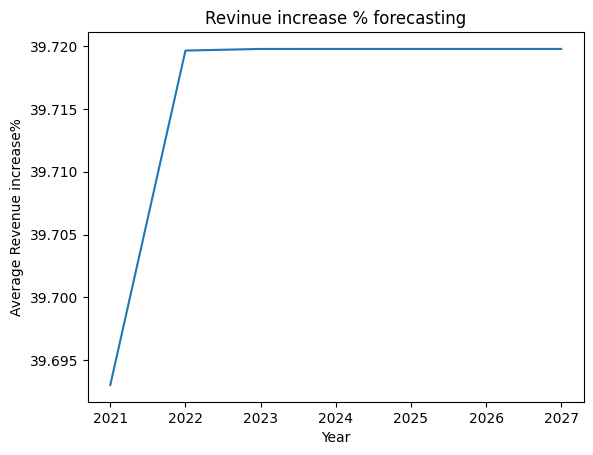

In [198]:
plt.plot(forecast["year"],forecast["Avg_forecast"])
plt.title("Revinue increase % forecasting")
plt.xlabel("Year")
plt.ylabel("Average Revenue increase%")
plt.show()